In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('UpdatedResumeDataSet.csv')

In [5]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [6]:
df.shape

(962, 2)

In [7]:
df['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

C:\Users\Acer\AppData\Local\Temp\ipykernel_22128\3629142485.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Category', data=df, palette='Set1')  # You can try 'Set1', 'Set2', 'husl', etc.


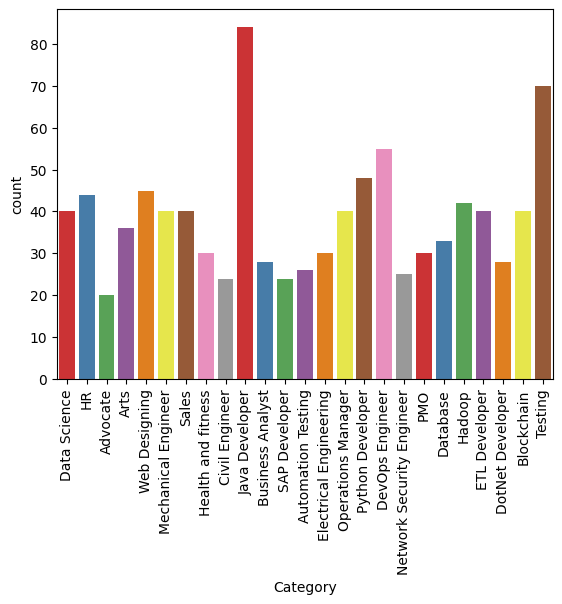

In [8]:
#plt.figure(figsize= (15,5))
#plt.figure(figsize= (15,5))
# Use palette for different colors
sns.countplot(x='Category', data=df, palette='Set1')  # You can try 'Set1', 'Set2', 'husl', etc.
#sns.countplot(df['Category'],color = 'red')
plt.xticks(rotation =90)
plt.show()

In [9]:
df['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

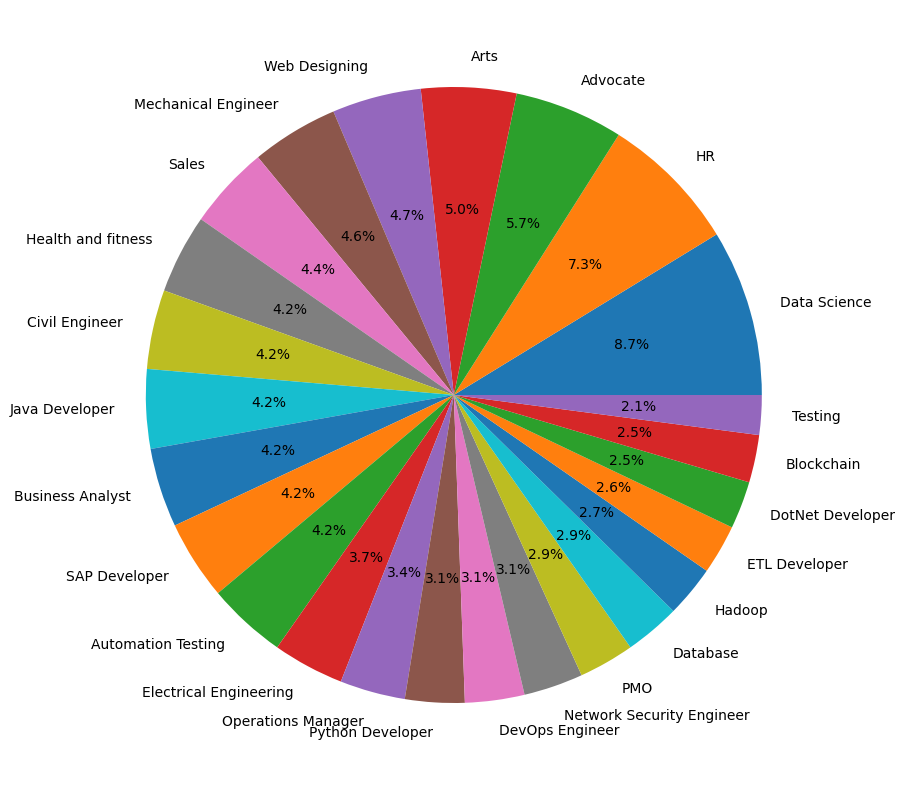

In [10]:
counts = df['Category'].value_counts()
label = df['Category'].unique()
plt.figure(figsize=(15,10))
plt.pie(counts,labels=label,autopct='%1.1f%%')
plt.show()

Exploring Resumes

In [11]:
df['Category'][0]

'Data Science'

In [12]:
df['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

cleaning the data

In [13]:
import re

def clean(text):
    cleantext = re.sub('https\S+', ' ', text)  # Remove hyperlinks
    cleantext = re.sub('@\S+', ' ', cleantext) # Remove mentions/emails
    cleantext = re.sub('#\S+\s', ' ', cleantext) # Remove hashtags
    cleantext = re.sub(r'[^\x00-\x7f]', ' ', cleantext) # Remove non-ASCII chars#
    cleantext = re.sub('[%s]' % re.escape("""!#$&'()+,<>?;:=@[]^_`{|}~"""), ' ', cleantext) # Remove punctuations
    cleantext = re.sub('\s+', ' ', cleantext)  # Replace multiple spaces with single space
    cleantext = cleantext.strip()  # Optional: remove leading/trailing spaces
    return cleantext

In [14]:
 df['Resume']=df['Resume'].apply(lambda x:clean(x))

In [15]:
df['Resume'][2]

'Areas of Interest Deep Learning Control System Design Programming in-Python Electric Machinery Web Development Analytics Technical Activities q Hindustan Aeronautics Limited Bangalore - For 4 weeks under the guidance of Mr. Satish Senior Engineer in the hangar of Mirage 2000 fighter aircraft Technical Skills Programming Matlab Python and Java LabView Python WebFrameWork-Django Flask LTSPICE-intermediate Languages and and MIPOWER-intermediate Github GitBash Jupyter Notebook Xampp MySQL-Basics Python Software Packages Interpreters-Anaconda Python2 Python3 Pycharm Java IDE-Eclipse Operating Systems Windows Ubuntu Debian-Kali Linux Education Details January 2019 B.Tech. Electrical and Electronics Engineering Manipal Institute of Technology January 2015 DEEKSHA CENTER January 2013 Little Flower Public School August 2000 Manipal Academy of Higher DATA SCIENCE DATA SCIENCE AND ELECTRICAL ENTHUSIAST Skill Details Data Analysis- Exprience - Less than 1 year months excel- Exprience - Less than 

words into categorical value

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [17]:
le.fit(df['Category'])
df['Category'] = le.transform(df['Category'])

In [18]:
df['Category'].unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

vectorization

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfid = TfidfVectorizer(stop_words='english')

tfid.fit(df['Resume'])
vectext = tfid.transform(df['Resume'])

In [20]:
#print(vectext)
from imblearn.over_sampling import SMOTE

X_dense = vectext.toarray()

#using here synthetic data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_dense,df['Category'])

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score
clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train,y_train)

OneVsRestClassifier(estimator=KNeighborsClassifier())

In [23]:
y_pred = clf.predict(X_test)
print(y_pred)

[ 1  4 12  6  8 19  0 20  9 14 12  6 11 21 17  3 18 10 12 18  9 20  4 23
  9 22  4 12  4 20 12  9  5  2  6  4  2  7  2 22  5 16  5  7  7 21 15  7
 19 20 20 12 21 14  9  8  1 13 17 20 17  2 14 10 24 20  0 22  8 22  5 15
  4 18 22 12  0 15 20  9  1 22  3  1 14 11 14 10 15  9 20 24 16  2  7  9
 21  1  5 12 18  1  4 15 17  1 23  8 12 20  8  7 13 10 11  3 16 14 16  9
  4  7 14 16 11 15 22 24 20 16 17 18 23 12  6 23 21 22 24 15  5 17 19  3
 23  0  2  9 21 19 16 22 20 14 22 15 19 19  9 13  1 16  7 13  9  8 20 12
  5  3  7  8 18 11  9 10 14 20 14  2 14 10 23 11 17 14 21 10 10 15 16 10
  3  8 21  5 11 11 21 18 23 22 21  4 10 14  0  7 24  1  2  0 19 12 10 21
 16 10 16 17  8 22 22  6 13 21 11 16 18 22 13  7  6 11  1  0  6  7 15 17
  4 17 11 10 20 17  1 15  7  5  0 24  7 23  9 19 20  5  8  7  1  5 11  6
  0 22 17  1  3 20 22 21 21 23 13  7 17  8  7  4 19  9  1 21 23 16 22 19
  3 18  3  7  0 13  2  5 13 10 12 15 11  4  5  1  0  8  2  0  4 11  7 10
  6 13 16 12 24  8 18 10 23  4 11  9 12  7 17 18  7

In [24]:
print('Accuracy score:',accuracy_score(y_test,y_pred))

Accuracy score: 0.9952380952380953


prediction system

In [25]:
from sklearn.metrics import classification_report
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        13\n           1       1.00      1.00      1.00        20\n           2       0.94      1.00      0.97        15\n           3       1.00      1.00      1.00        13\n           4       1.00      1.00      1.00        19\n           5       1.00      1.00      1.00        17\n           6       1.00      1.00      1.00        12\n           7       1.00      1.00      1.00        24\n           8       1.00      0.88      0.94        17\n           9       0.95      1.00      0.97        19\n          10       1.00      1.00      1.00        19\n          11       1.00      1.00      1.00        21\n          12       1.00      1.00      1.00        21\n          13       1.00      1.00      1.00        13\n          14       1.00      1.00      1.00        16\n          15       1.00      1.00      1.00        16\n          16       1.00      1.00      1.00        19\n       

In [26]:
proba = clf.predict_proba(X_test)
top3 = np.argsort(proba, axis=1)[:, -3:]
print(top3)

[[11 24  1]
 [11 24  4]
 [ 1 11 12]
 ...
 [ 1 11 12]
 [11 24 16]
 [ 1 24 11]]


In [24]:
import pickle 
pickle.dump(tfid,open('tfid.pkl','wb'))
pickle.dump(clf,open('clf.pkl','wb'))